In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
train_df  = pd.read_csv('C:/Users/Akanksha/Downloads/LinearRegression/ex1data2.txt', names=["size","bedroom","price"])


In [3]:
train_df.head()

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


We can see that all the variables are in different range. SO running linear regressionj without normalizing these features will bias the result towards size as they will dominate. 

In [4]:
train_df_normalized = (train_df - train_df.mean())/train_df.std()
train_df_normalized.head()


,size,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [5]:
"""No of training examples"""
m = train_df.shape[0]

In [6]:
y = train_df_normalized[train_df_normalized.columns[-1]].reshape(m,1)
y.shape

C:\Users\Akanksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(47, 1)

In [7]:
x  = train_df_normalized.drop(train_df_normalized.columns[-1], axis = 1)
#x = pd.DataFrame(train_df[0])
#display(x)
x.head()

,size,bedroom
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417


In [8]:
# initialize parameters 
import numpy as np

theta  = (np.zeros((train_df.shape[1],1)))

#alpha = 0.01
#iterations = 1500

one = np.ones((m, 1))

X = np.concatenate((one, x), axis=1)

display(X.shape)
print(theta.shape)

(47, 3)

(3, 1)


In [9]:
# Set the hyperparameters
alpha = 0.01
iterations = 1500


In [10]:
def computecost(X,y, theta):
    
    """ return : Cost function """
        
    #hypothesis
    h = np.dot(X ,theta)
    error = h-y
    loss = np.power(error,2)
    J = np.sum(loss)/(2*m)
   
    return J

cost = computecost(X,y, theta)
print(cost)

0.48936170212765967


In [12]:
"""Implementing gradient descent"""
def gradient_descent(X, y, theta, alpha, num_iters):
    
       
    costs = np.zeros(num_iters)
    for i in range(0,num_iters):
        
        
        gradient = np.dot(X, theta) - y
        
              
        theta = theta - (alpha/len(X))*np.sum(X*gradient, axis = 0)
        costs[i] = computecost(X, y, theta)
        
        if i%100 == 0:
            print("Iteration %d | Cost: %f" % (i, costs[i]))
    
    return theta, costs

g, cost = gradient_descent(X, y, theta, alpha, iterations)
#Print the results...
print(g)

finalCost = computecost(X,y,g)
print("final cost---" , finalCost)
                                
        

Iteration 0 | Cost: 1.452145
Iteration 100 | Cost: 1.115394
Iteration 200 | Cost: 1.163451
Iteration 300 | Cost: 1.179316
Iteration 400 | Cost: 1.182978
Iteration 500 | Cost: 1.183776
Iteration 600 | Cost: 1.183948
Iteration 700 | Cost: 1.183984
Iteration 800 | Cost: 1.183992
Iteration 900 | Cost: 1.183994
Iteration 1000 | Cost: 1.183994
Iteration 1100 | Cost: 1.183995
Iteration 1200 | Cost: 1.183995
Iteration 1300 | Cost: 1.183995
Iteration 1400 | Cost: 1.183995
[[-9.71799473e-17  5.48080492e-01  2.83506676e-01]
 [-9.71799473e-17  5.48080492e-01  2.83506676e-01]
 [-9.71799473e-17  5.48080492e-01  2.83506676e-01]]
final cost--- 1.1839945233435982


Text(0.5,1,'Error vs. Training Epoch')

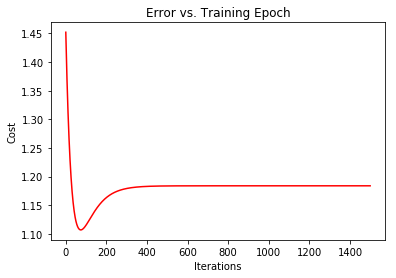

In [13]:
fig, ax = plt.subplots()
ax.plot(np.arange(iterations), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  
